# Desafio de Detecção e Redução de Fraudes no Setor Financeiro

Embora muito se fale da capacidade de geração de receita das empresas, um dos principais entraves para o sucesso de um negócio está atrelado ao seu custo. A captação de clientes se tornou cada vez mais penosa, assim como a manutenção da carteira. Com isso, a gestão de custo se tornou um fator extremamente estratégico para garantir a margem e o crescimento das empresas.

No entanto, o advento no mundo digital para expandir o negócio ou garantir a sua sobrevivência enfrenta um grande desafio para redução do custo operacional: as fraudes, sobretudo as relacionadas às operações comerciais e financeiras, que impactam, na prática, todos os tipos de indústrias e setores da economia. Do governo, ao banco, do varejista ao microempreendedor, todos precisam conhecer e enfrentar este desafio.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers
pio.renderers.default = "notebook_connected"
import plotly.express as px
import statsmodels.formula.api as smf

# Carregando os dados
data = pd.read_csv('1. Dados/balanceado_train.csv').drop('Unnamed: 0', axis=1)
test = pd.read_csv('1. Dados/balanceado_test.csv').drop('Unnamed: 0', axis=1)

In [2]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,634.41,C91220956,18396.16,17761.75,M999221400,0.00,0.00,0,0
1,1,PAYMENT,6623.21,C380616082,1036.00,0.00,M744316958,0.00,0.00,0,0
2,2,PAYMENT,8068.50,C1973281540,19934.00,11865.50,M1447678234,0.00,0.00,0,0
3,3,PAYMENT,22415.68,C856937591,31164.00,8748.32,M741095751,0.00,0.00,0,0
4,3,TRANSFER,521678.46,C954742840,0.00,0.00,C667346055,10269700.81,10670907.24,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 0 to 11540
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11541 non-null  int64  
 1   type            11541 non-null  object 
 2   amount          11541 non-null  float64
 3   nameOrig        11541 non-null  object 
 4   oldbalanceOrg   11541 non-null  float64
 5   newbalanceOrig  11541 non-null  float64
 6   nameDest        11541 non-null  object 
 7   oldbalanceDest  11541 non-null  float64
 8   newbalanceDest  11541 non-null  float64
 9   isFraud         11541 non-null  int64  
 10  isFlaggedFraud  11541 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 991.9+ KB


Roteiro para o desafio:

 Tratamento de Dados

- Faça o tratamento das features do dataset que são textuais (tipo de transação, origem, destino e categorização). 

- Faça o tratamento das variáveis numéricas. 

Modelagem

- É interessante criar novas features para a modelagem do problema (Ex: número de transações que foram feitas a partir de uma conta). Seja criativa(o)!



In [4]:
data['hour_of_the_day'] = data['step']%24
data['oldbalance'] = data['oldbalanceOrg']-data['oldbalanceDest']

test['hour_of_the_day'] = test['step']%24
test['oldbalance'] = test['oldbalanceOrg']-test['oldbalanceDest']

Análise Exploratória

- Calcule a correlação entre as variáveis que compõem o dataset. Existem variáveis que são altamente correlacionadas? Existe a necessidade de utilizar todas as variáveis que estão no dataset?

In [5]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour_of_the_day,oldbalance
step,1.000000,0.150626,0.076674,-0.023842,-0.013902,0.023681,0.334377,0.031463,-0.091734,0.066305
amount,0.150626,1.000000,0.638393,0.105578,0.056064,0.337309,0.343550,0.077317,-0.096728,0.435304
oldbalanceOrg,0.076674,0.638393,1.000000,0.816866,0.011618,0.135774,0.123913,0.066300,-0.027533,0.733659
newbalanceOrig,-0.023842,0.105578,0.816866,1.000000,0.045157,0.004725,-0.140279,0.095158,0.051424,0.575064
oldbalanceDest,-0.013902,0.056064,0.011618,0.045157,1.000000,0.906043,-0.094938,-0.008691,0.030728,-0.670948
newbalanceDest,0.023681,0.337309,0.135774,0.004725,0.906043,1.000000,0.008380,-0.011452,0.003798,-0.515030
isFraud,0.334377,0.343550,0.123913,-0.140279,-0.094938,0.008380,1.000000,0.032371,-0.311861,0.156405
isFlaggedFraud,0.031463,0.077317,0.066300,0.095158,-0.008691,-0.011452,0.032371,1.000000,0.007264,0.055072
hour_of_the_day,-0.091734,-0.096728,-0.027533,0.051424,0.030728,0.003798,-0.311861,0.007264,1.000000,-0.041299
oldbalance,0.066305,0.435304,0.733659,0.575064,-0.670948,-0.515030,0.156405,0.055072,-0.041299,1.000000


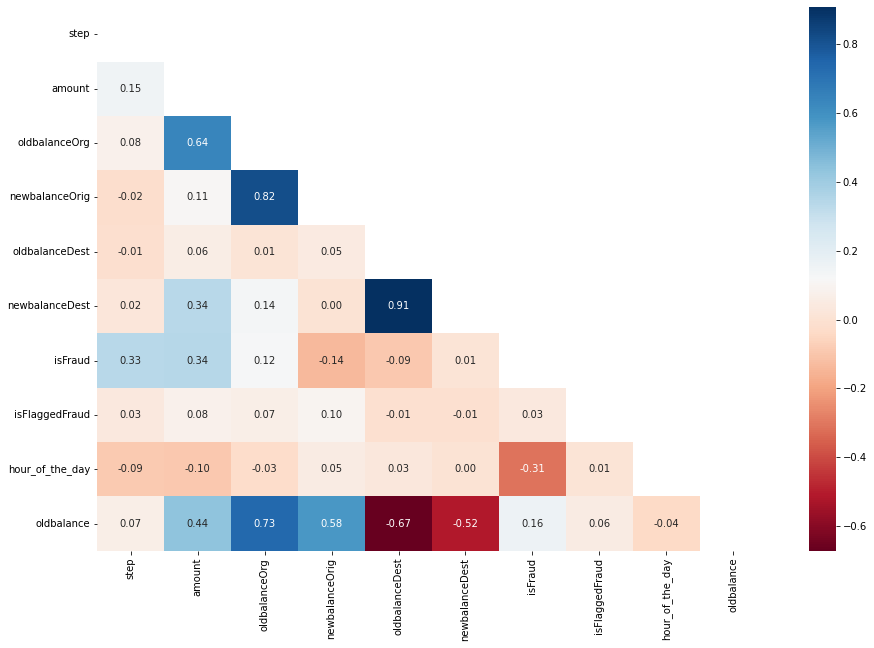

In [6]:
sns.set_context(font_scale=0.05)
plt.figure(figsize=(15,10))
sns.heatmap(
    data.corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
    mask=np.triu( # Faz uma matriz triangular
        np.ones_like(data.corr()) # usando como base uma matriz de '1's, do mesmo tamanho que a matriz de correlação
    ) # A máscara vai então 'apagar' a diagonal superior da matriz
           )
plt.show()

In [7]:
colunas_numericas = [['amount','oldbalanceOrg','newbalanceOrig'],
                    ['oldbalanceDest','newbalanceDest','hour_of_the_day']]

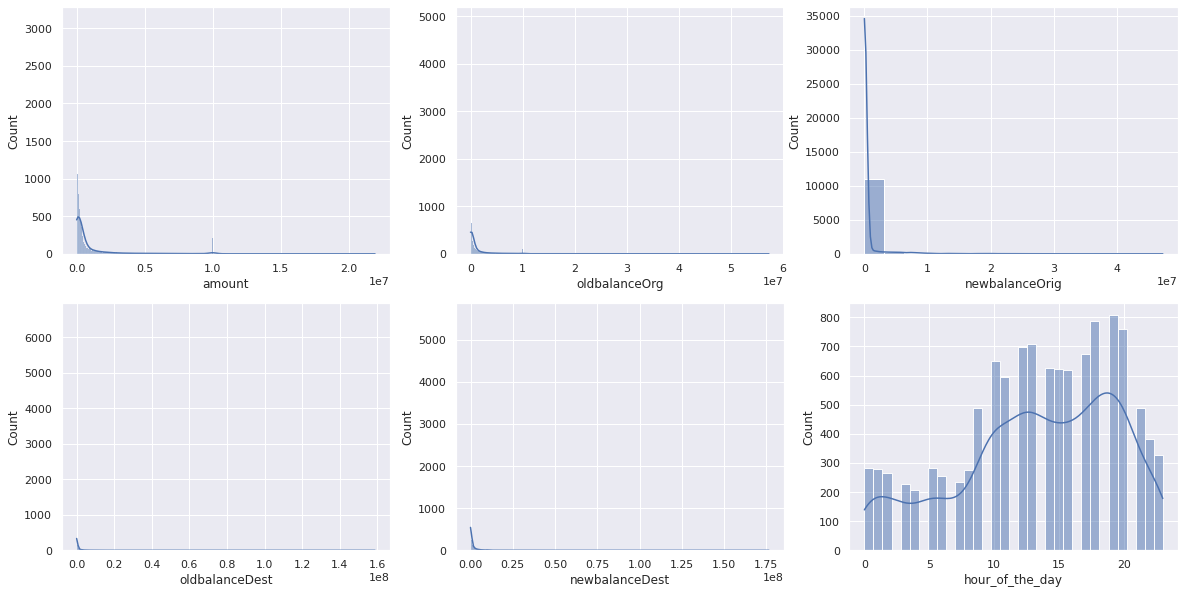

In [8]:
sns.set(font_scale=1)

fig, eixo = plt.subplots(2,3,figsize=(20,10)) 

# Para cada linha 
for i in range(2):
    # Para cada coluna
    for j in range(3):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'PrecoVenda'
            sns.histplot(data=data, x=colunas_numericas[i][j], kde=True, ax=eixo[i][j])

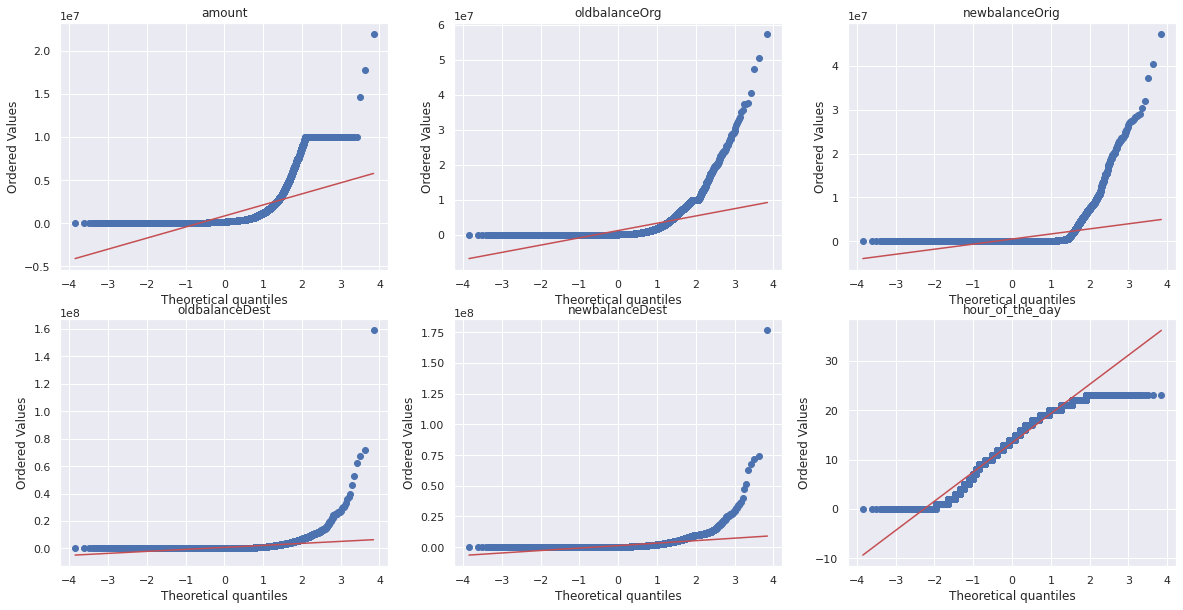

<Figure size 432x288 with 0 Axes>

In [9]:
from scipy import stats

sns.set(font_scale=1)
fig, eixo = plt.subplots(2,3,figsize=(20,10)) 

fig = plt.figure()

for i in range(2):
    # Para cada coluna
    for j in range(3):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':
                       
            prob = stats.probplot(data[colunas_numericas[i][j]], dist=stats.norm, plot=eixo[i][j])
            eixo[i][j].set_title(f'{colunas_numericas[i][j]}')
                       
plt.show()

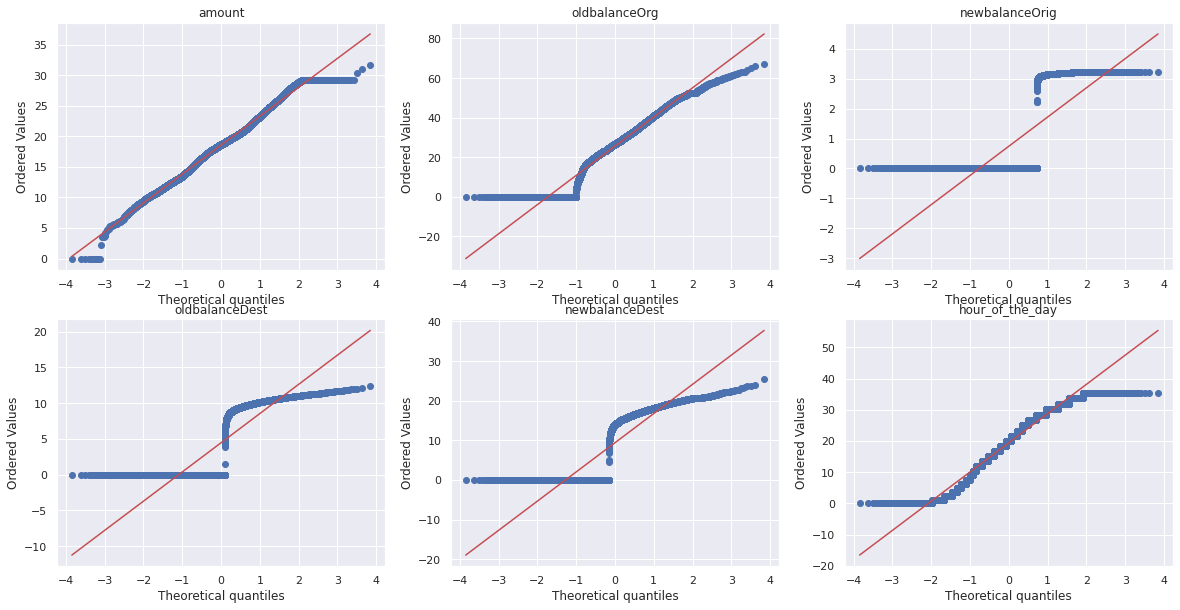

<Figure size 432x288 with 0 Axes>

In [10]:
from scipy import stats

from scipy.special import boxcox, inv_boxcox

fig, eixo = plt.subplots(2,3,figsize=(20,10)) 

fig = plt.figure()

lambda_coluna = {}

for i in range(2):
    # Para cada coluna
    for j in range(3):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':                    
            
            
            xt, lam = stats.yeojohnson(data[colunas_numericas[i][j]])
            lambda_coluna[colunas_numericas[i][j]]= lam
            prob = stats.probplot(xt, dist=stats.norm, plot=eixo[i][j])
            eixo[i][j].set_title(f'{colunas_numericas[i][j]}')

plt.show()

In [11]:
lambda_coluna

{'amount': 0.06771475062291474,
 'oldbalanceOrg': 0.12554332110487904,
 'newbalanceOrig': -0.30885481243013463,
 'oldbalanceDest': -0.04829421564564542,
 'newbalanceDest': 0.02907403615186401,
 'hour_of_the_day': 1.1837961805823418}

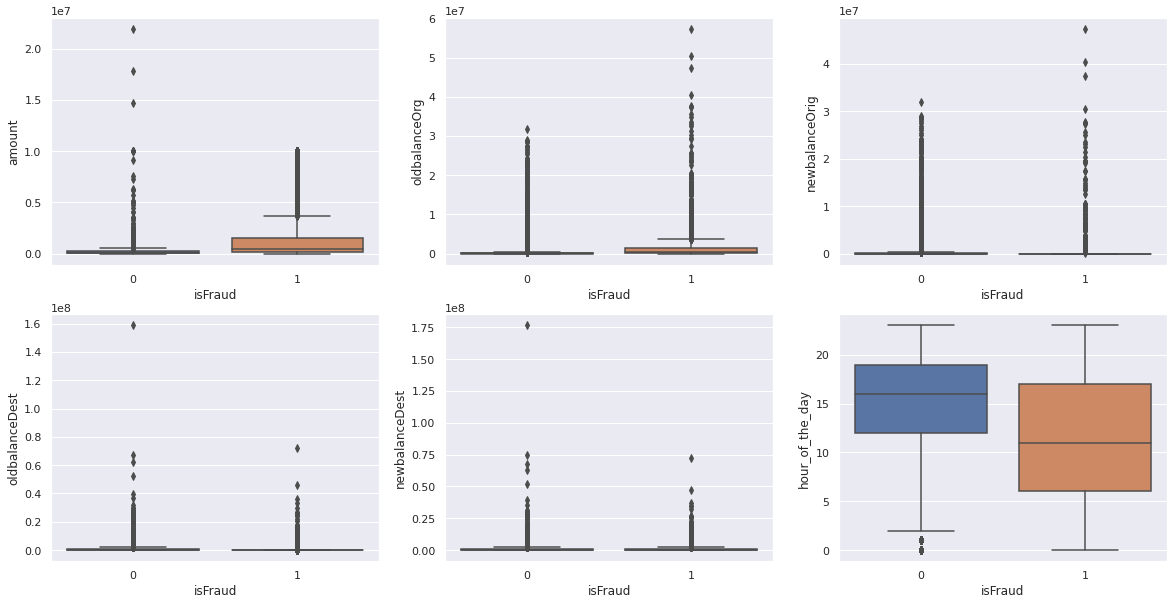

In [12]:
sns.set(font_scale=1)

fig, eixo = plt.subplots(2,3,figsize=(20,10)) 

# Para cada linha 
for i in range(2):
    # Para cada coluna
    for j in range(3):
        # Verifica se existe um nome de coluna na lista 'colunas_categoricas'
        if colunas_numericas[i][j] != '':
            # Se sim faz o plot do Boxplot naquela linha e coluna, indicando no eixo vertical/y sempre a variável 'PrecoVenda'
            sns.boxplot(data=data,y=colunas_numericas[i][j],x='isFraud',ax=eixo[i][j],orient='v')

<AxesSubplot:xlabel='type', ylabel='Count'>

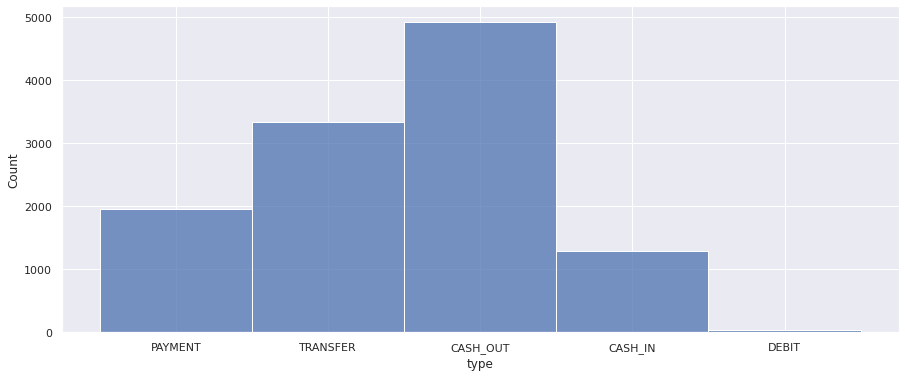

In [13]:
plt.figure(figsize=(15,6))
sns.histplot(data=data, x="type")

In [14]:
fig = px.histogram(data, x="hour_of_the_day", color="isFraud")
fig.show()

In [15]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split

from category_encoders import JamesSteinEncoder

Separação dos dados em treinamento e validação: os dados devem ser separados em treino, validação e teste, na fase de exploração e modelagem você pode avaliar o modelo usando o dataset de validação para evitar overfitting, e depois, com estudo fechado aplicar as métricas de avaliação no dataset de teste (simulando a performance em exemplos nunca vistos). Para esse caso você deve separar os datasets usando a função train_test_split do sklearn, usando como random state o número 42:

In [16]:
X_train = data.drop(columns='isFraud')
y_train = data['isFraud']

X_test = test.drop(columns='isFraud')
y_test = test['isFraud']

In [17]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'hour_of_the_day', 'oldbalance'],
      dtype='object')

drop_feat --> Colunas de baixo impacto no modelo, estão sendo removidas

numeric_features --> Colunas numericas, seguirão por um tipo de tratamento no Pipeline

categorical_features --> Colunas Categoricas, seguirão por outro tipo de tratamento no Pipeline

In [18]:
drop_feat =  ['step','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud']

In [19]:
numeric_features = ['amount', 'hour_of_the_day','oldbalance']

In [20]:
categorical_features = ['type']

In [21]:
for i in drop_feat:
    try:        
        categorical_features.remove(i)
    except ValueError:
        pass
    try:
        numeric_features.remove(i)       
    except ValueError:
        pass

In [22]:
from sklearn import set_config
set_config(display='diagram')

In [23]:
numeric_transformer = Pipeline(steps=[
                                     ('imputar_mediana', SimpleImputer(strategy='median')),
                                     ('PowerTransformer', PowerTransformer())
                                     ])

categorical_transformer = Pipeline(steps=[                                         
                                         ('OrdinalEncoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value= -1)),
                                         ('imputar_mais_frequente', SimpleImputer(strategy='most_frequent')),
                                         ('stdscaler', StandardScaler())
                                         ])

In [24]:
col_transformer = ColumnTransformer(transformers=[('numeric_processing',numeric_transformer, numeric_features),
                                                  ('categorical_processing', categorical_transformer, categorical_features)
                                                  ], remainder='drop')

In [25]:
pipeline = Pipeline([
                     ('transform_column', col_transformer),
                    ])

In [26]:
pipeline.fit(X_train)

Pipeline(steps=[('transform_column',
                 ColumnTransformer(transformers=[('numeric_processing',
                                                  Pipeline(steps=[('imputar_mediana',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['amount', 'hour_of_the_day',
                                                   'oldbalance']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputar_mais_frequente',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['type'])]))])

In [27]:
transformed_train=pipeline.transform(X_train)

In [28]:
transformed_train.shape

(11541, 4)

In [29]:
for name, estimator, features in pipeline.named_steps['transform_column'].transformers_:
  print(name)
  print(features)

numeric_processing
['amount', 'hour_of_the_day', 'oldbalance']
categorical_processing
['type']
remainder
[0, 3, 4, 5, 6, 7, 8, 9]


In [30]:
pipeline = Pipeline([
                     ('transform_column', col_transformer),
                     ('XGboost', GradientBoostingClassifier(n_estimators = 1000,learning_rate=0.02))
                    ])

In [31]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform_column',
                 ColumnTransformer(transformers=[('numeric_processing',
                                                  Pipeline(steps=[('imputar_mediana',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('PowerTransformer',
                                                                   PowerTransformer())]),
                                                  ['amount', 'hour_of_the_day',
                                                   'oldbalance']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('OrdinalEncoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputar_mais_frequente',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('stdscaler',
                                                                   StandardScaler())]),
                                                  ['type'])])),
                ('XGboost',
                 GradientBoostingClassifier(learning_rate=0.02,
                                            n_estimators=1000))])

In [32]:
print("pipeline train r2_score: %0.3f" % pipeline.score(X_train, y_train))

pipeline train r2_score: 0.940


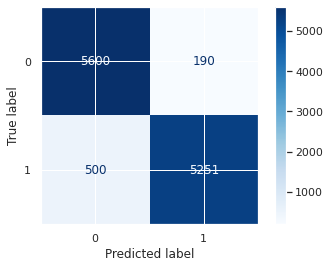

In [33]:
y_pred = pipeline.predict(X_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')

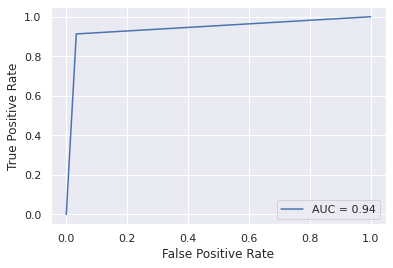

In [34]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred)

roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

Análise dos Resultados

- Faça o cálculo das classificações para avaliar os resultados que foram obtidos com os modelos avaliados. Qual modelo obteve o melhor resultado?

- Dada a matriz de confusão e o limiar que vocês escolheram, qual os possíveis impactos no negócio vocês identificam nesta solução? Quais observações vocês podem fazer com relação aos impactos dos falsos positivos e falsos negativos?

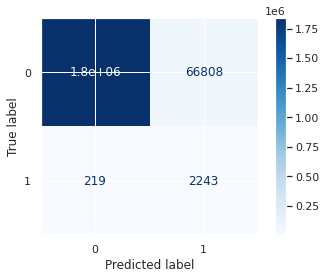

In [35]:
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot(cmap='Blues')


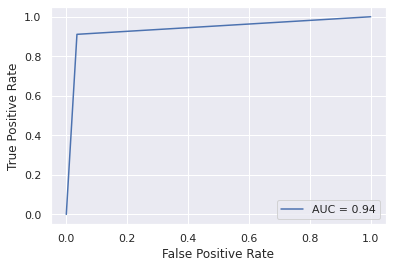

In [36]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()


- Avalie a importância das features que foram utilizadas no treinamento do modelo. Você considera a remoção de alguma delas? Por que? As features que você criou tiveram relevância para o resultado final do modelo?

In [37]:
from sklearn.inspection import permutation_importance

scoring = ['neg_root_mean_squared_error']
r_multi = permutation_importance(
    pipeline, X_test, y_test, n_repeats=3, random_state=42, scoring=scoring, n_jobs=-1)

for metric in r_multi:
    print(" ")
    print(f"{metric}")
    print(" ")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if abs(r.importances_mean[i]) >= 0.0025:
            print(f"    {X_test.columns[i]:<8}:  "
                    f"{r.importances_mean[i]:.3f}"
                    f" +/- {r.importances_std[i]:.3f}")

 
neg_root_mean_squared_error
 
    type    :  0.179 +/- 0.000
    oldbalance:  0.107 +/- 0.000
    amount  :  0.061 +/- 0.000
    hour_of_the_day:  0.024 +/- 0.000


# Análise da Solução

- Discuta os resultados obtidos com os resultados da matriz de confusão.

- Quais outras soluções vocês poderiam propor para este desafio?

- Quais variáveis que não estavam presentes no dataset que vocês entendem que seriam relevantes para a solução do problema?

- Quais variáveis que não estavam presentes no dataset que vocês entendem que seriam relevantes para a solução do problema?